In [3]:
import tensorflow as tf
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
from pathlib import Path
import csv

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import os
import gc

In [4]:
label_item = {'tree': 0,
 'star': 1,
 'hamburger': 2,
 'diamond': 3,
 'bee': 4,
 'The_Eiffel_Tower': 5,
 'sword': 6,
 'cake': 7,
 'bicycle': 8,
 'ladder': 9,
 'door': 10,
 'guitar': 11,
 'scissors': 12,
 'chair': 13,
 'bird': 14,
 'pencil': 15,
 'airplane': 16,
 'shoe': 17,
 'hand': 18,
 'hat': 19,
 'hammer': 20,
 'rabbit': 21,
 'leaf': 22,
 'lion': 23,
 'computer': 24,
 'butterfly': 25,
 'camera': 26,
 'cat': 27,
 'clock': 28,
 'ear': 29}

labels = {value:key for key,value in label_item.items()}
print(labels)

{0: 'tree', 1: 'star', 2: 'hamburger', 3: 'diamond', 4: 'bee', 5: 'The_Eiffel_Tower', 6: 'sword', 7: 'cake', 8: 'bicycle', 9: 'ladder', 10: 'door', 11: 'guitar', 12: 'scissors', 13: 'chair', 14: 'bird', 15: 'pencil', 16: 'airplane', 17: 'shoe', 18: 'hand', 19: 'hat', 20: 'hammer', 21: 'rabbit', 22: 'leaf', 23: 'lion', 24: 'computer', 25: 'butterfly', 26: 'camera', 27: 'cat', 28: 'clock', 29: 'ear'}


In [5]:
def sample_images(model, model_name,classifier):
    name = model_name[4:len(model_name)-3]
    l=[]
    l.append(name)
    true_label = list(map(label_item.get, l))
    for i in range(30):
        random_noise = np.random.normal(0, 1, size=[1, 100])
        generated_images = model.predict(random_noise)
        generated_images = (generated_images.reshape(1, 64, 64) + 1) *0.5
        
        data = np.array(generated_images)
        data = data.reshape(data.shape[0], 64, 64, 1)
        
        ans = np.argmax(classifier.predict(data), axis=1)
        
        if int(ans[0]) == int(true_label[0]):

            my_dpi = 96
            plt.figure(figsize=(64/my_dpi, 64/my_dpi), dpi=my_dpi)
            plt.imshow(generated_images[0], interpolation='nearest', cmap='gray')
            plt.axis('off')

            f_name = name + '_' + str(i)
            path_ = os.path.abspath('./output/image')
            
            plt.savefig(os.path.join(path_, (f_name+'.png')))
            
            p = './output/csv/' + f_name + '.csv'
            np.savetxt(p, np.array(generated_images[0]), delimiter=",")

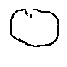

In [99]:
from keras.models import load_model
model = load_model('./models/GAN_clock.h5')
classifier = load_model('classifier_model.h5')
model_name = 'GAN_clock.h5'
sample_images(model,model_name,classifier)

In [6]:
# models = os.listdir('./models')
models = ['GAN_computer.h5','GAN_hamburger.h5', 'GAN_guitar.h5','GAN_hammer.h5','GAN_lion.h5','GAN_scissors.h5','GAN_star.h5','GAN_pencil.h5','GAN_sword.h5','GAN_rabbit.h5']

./models/GAN_computer.h5


/Users/kuohuichi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


./models/GAN_hamburger.h5
./models/GAN_guitar.h5
./models/GAN_hammer.h5
./models/GAN_lion.h5
./models/GAN_scissors.h5
./models/GAN_star.h5
./models/GAN_pencil.h5
./models/GAN_sword.h5
./models/GAN_rabbit.h5


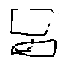

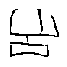

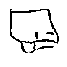

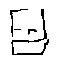

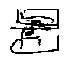

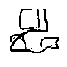

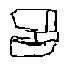

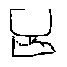

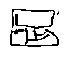

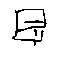

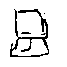

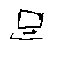

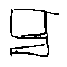

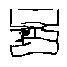

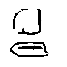

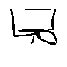

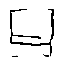

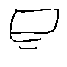

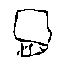

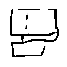

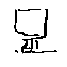

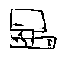

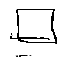

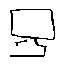

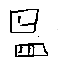

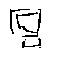

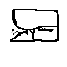

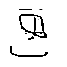

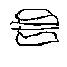

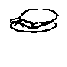

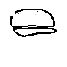

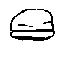

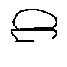

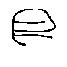

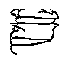

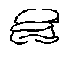

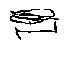

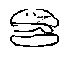

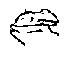

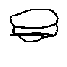

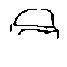

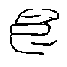

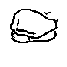

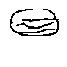

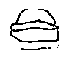

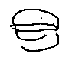

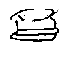

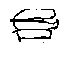

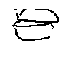

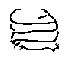

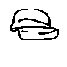

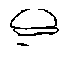

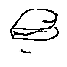

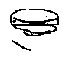

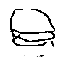

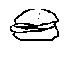

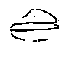

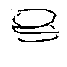

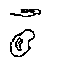

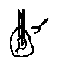

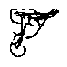

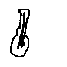

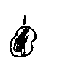

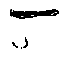

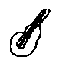

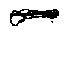

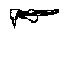

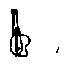

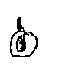

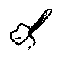

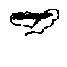

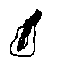

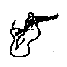

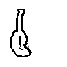

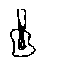

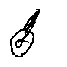

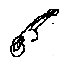

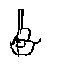

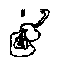

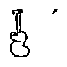

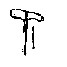

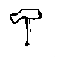

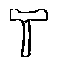

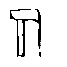

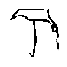

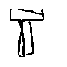

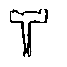

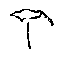

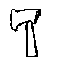

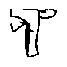

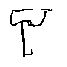

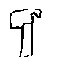

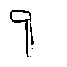

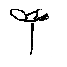

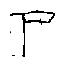

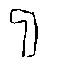

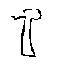

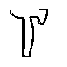

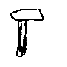

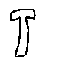

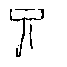

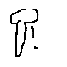

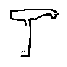

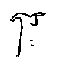

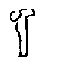

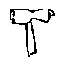

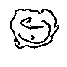

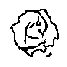

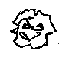

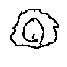

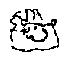

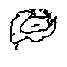

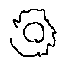

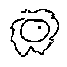

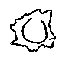

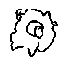

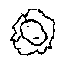

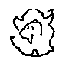

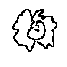

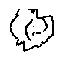

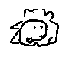

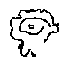

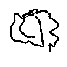

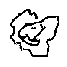

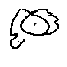

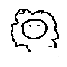

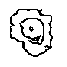

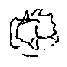

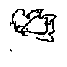

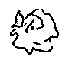

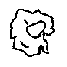

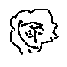

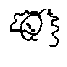

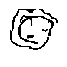

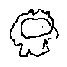

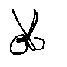

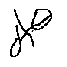

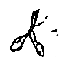

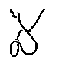

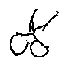

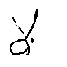

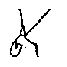

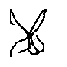

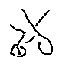

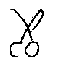

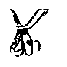

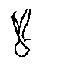

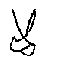

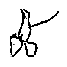

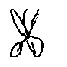

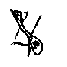

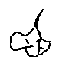

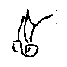

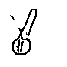

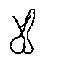

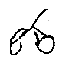

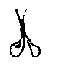

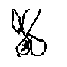

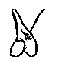

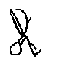

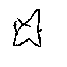

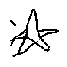

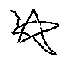

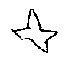

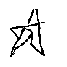

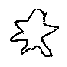

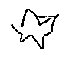

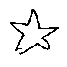

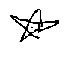

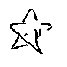

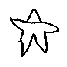

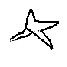

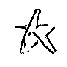

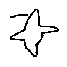

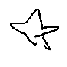

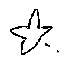

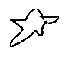

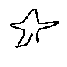

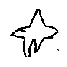

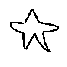

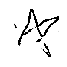

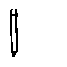

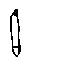

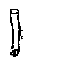

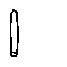

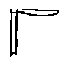

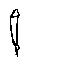

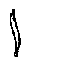

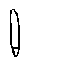

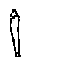

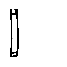

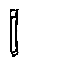

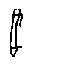

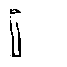

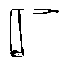

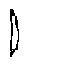

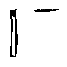

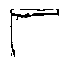

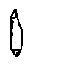

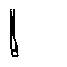

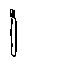

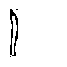

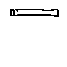

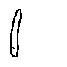

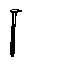

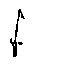

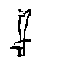

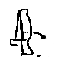

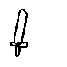

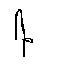

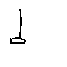

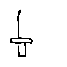

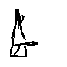

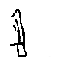

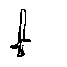

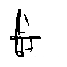

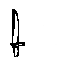

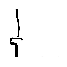

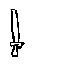

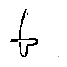

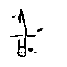

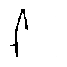

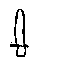

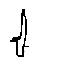

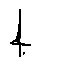

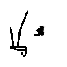

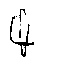

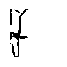

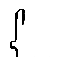

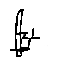

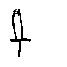

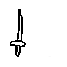

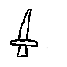

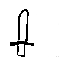

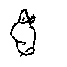

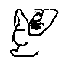

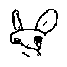

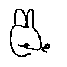

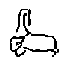

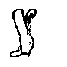

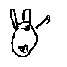

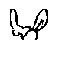

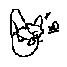

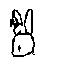

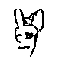

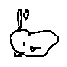

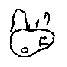

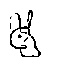

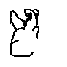

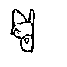

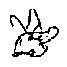

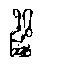

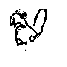

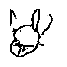

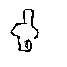

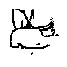

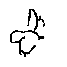

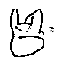

In [8]:
from keras.models import load_model
for model_name in models:
    model_path = './models/' + model_name
    print(model_path)
    classifier = load_model('classifier_model.h5')
    model = load_model(model_path)
    sample_images(model,model_name,classifier)

In [100]:
import cv2
img = cv2.imread('./output/image/clock_0.png', cv2.IMREAD_GRAYSCALE)
img.shape
# img = cv2.resize(img,(64,64))
# for i in range(64):
#     print(img[i])
# img[20]
# img = img.reshape(1,64,64,1)
# img = np.where(img == 255,1,0)

(64, 64)